#  Análisis de datasets de Hungtington

Consideramos los datasets: 

*   INVESTIGATION OF DIFFERENTIALLY EXPRESSED GENE RELATED TO HUNTINGTON’S
DISEASE USING GENETIC ALGORITHM (referencia apuntes overleaf i.13)
*   Identification of Biclusters in Huntington’s Disease Dataset Using a New Variant of Grey Wolf
Optimizer (referencia apuntes overleaf i.15)

`GSE3790` y `GSE26927`

> **Contexto GSE3790:** El dataset se obtuvo del organismo *homo sapiens*. El tipo de experimento fue: *expression profiling by array*. El resumen: *Post mortem human brain tissue comparison between HD patients and controls from 3 brain regions - cerebellum, frontal cortex [BA4, BA9] and caudate nucleus. Gene expression analysed using linear models from LIMMA package in Bioconductor suite*. El diseño: *Large sample sizes were used to examine brain tissue gene expression at various stages of HD pathology. Three brain regions were profiled, compared and analysed for differential gene expression. The broad aim was to capture early stage gene expression changes in HD brains*.

## Primero extraemos archivos .gz

Así obtenemos los archivos .cel necesarios para hacer el análisis de datos.

Esta extensión está asociada con experimentos de microarrays de Affymetrix y contienen valores sin procesar de cada prueba del microarray.

Affymetrix es una empresa, y de ahí el nombre de la plataforma para procesamiento de muestras provenientes de RNA para análisis de expresión génica diferencial.

Utilizaremos el módulo [biopython](https://biopython.org/docs/1.75/api/Bio.Affy.CelFile.html) para trabajar con archivos con formato .cel

In [1]:
import os
import gzip
import zipfile
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
dir_ = '../Data/GSE3790/'


In [19]:
# Esta celda solo se corre una vez para descomprimir los archivos .gz
for item in os.listdir(dir_):
    name = item.split('.gz')[0]
    print(name)
    # zip = zipfile.ZipFile(f'{dir}{item}')
    # zip.extractall()
    # zip.close()
    with gzip.open(f'{dir_}{item}', 'rb') as f_in:
        with open(f'{dir_}{name}', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

GSM86787.cel
GSM86788.cel
GSM86789.cel
GSM86790.cel
GSM86791.cel
GSM86792.cel
GSM86793.cel
GSM86794.cel
GSM86795.cel
GSM86796.cel
GSM86797.cel
GSM86798.cel
GSM86799.cel
GSM86800.cel
GSM86801.cel
GSM86802.cel
GSM86803.cel
GSM86804.cel
GSM86805.cel
GSM86806.cel
GSM86807.cel
GSM86808.cel
GSM86809.cel
GSM86810.cel
GSM86811.cel
GSM86812.cel
GSM86813.cel
GSM86814.cel
GSM86815.cel
GSM86816.cel
GSM86817.cel
GSM86818.cel
GSM86819.cel
GSM86820.cel
GSM86821.cel
GSM86822.cel
GSM86823.cel
GSM86824.cel
GSM86825.cel
GSM86826.cel
GSM86827.cel
GSM86828.cel
GSM86829.cel
GSM86830.cel
GSM86831.cel
GSM86832.cel
GSM86833.cel
GSM86834.cel
GSM86835.cel
GSM86836.cel
GSM86837.cel
GSM86838.cel
GSM86839.cel
GSM86840.cel
GSM86841.cel
GSM86842.cel
GSM86843.cel
GSM86844.cel
GSM86845.cel
GSM86846.cel
GSM86847.cel
GSM86848.cel
GSM86849.cel
GSM86850.cel
GSM86851.cel
GSM86852.cel
GSM86853.cel
GSM86854.cel
GSM86855.cel
GSM86856.cel
GSM86857.cel
GSM86858.cel
GSM86859.cel
GSM86860.cel
GSM86861.cel
GSM86862.cel
GSM86863.cel

## Observamos atributos y estadísticos

De los archivos descomprimidos obtuvimos archivos con formato .cel proveniente del pérfil de expresión génica con Affymatrix.

In [14]:
#Observamos la cantidad de archivos .cel que hay en el directorio
print(f"Cantidad de archivos .cel: {len(os.listdir(dir_))}")

Cantidad de archivos .cel: 404


In [2]:
from Bio.Affy import CelFile
import pandas as pd

In [3]:
def cel_read(file):
    file = f'../Data/GSE3790/{file}'
    print(file)
    with open(file,'r') as handle:
        cel_data = CelFile.read(handle) #el parametro version depende para ciertos paquetes
#         cel_values = cel_data.header.data tambien se puede pedir los atributos cel_data.ncols, cel_data.nrows, cel_data.stdevs,cel_data.npix, intensities
#         print(cel_values)
        return cel_data

In [4]:
ejemplo = cel_read('GSM86787.cel')

../Data/GSE3790/GSM86787.cel


In [5]:
print(f'''Número de filas: {ejemplo.nrows}\n
Número de columns: {ejemplo.ncols}\n
Intensidades: {ejemplo.intensities}\n
Desviacion estandar: {ejemplo.stdevs}\n
Número de pixeles: {ejemplo.npix}\n
Version del Affymatrix: {ejemplo.version}\n''')

Número de filas: 712

Número de columns: 712

Intensidades: [[  217.8 11579.3   223.  ... 13801.8   248.3 14241. ]
 [12470.    218.8 11507.8 ...   212.8 13649.    227.8]
 [  275.3 11250.8   220.8 ... 12645.8   246.3 13643.3]
 ...
 [12404.3   217.  11651.  ...   185.  10700.8   146. ]
 [  238.8 11953.5   237.3 ... 11242.5   186.3 11238.8]
 [13141.    235.3 12226.5 ...   175.  11644.3   129.8]]

Desviacion estandar: [[  54.2 1712.6   49.7 ... 2000.7   41.2 2039.2]
 [1651.1   59.2 1424.4 ...   32.2 1871.    41.4]
 [ 141.6 2036.6  117.6 ... 1874.4   52.2 1994. ]
 ...
 [1920.    38.5 1756.9 ...   38.5 1037.3   20.5]
 [  53.9 1740.7   38.  ... 1162.    20.9 1242.1]
 [1858.7   48.5 1738.7 ...   26.1 1178.9   16.9]]

Número de pixeles: [[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 ...
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]]

Version del Affymatrix: 3



In [6]:
print(f"Intensities es : {type(ejemplo.intensities)}")
print(f"Dimensiones del archivo de ejemplo: {ejemplo.intensities.ndim}")
print(f"Data type: {ejemplo.intensities.dtype}")
print(f"Shape: {ejemplo.intensities.shape}")
print(f"Valor máximo: {ejemplo.intensities.max()}")
print(f"Valor mínimo: {ejemplo.intensities.min()}")
print(f"Valor promedio: {ejemplo.intensities.mean():.2f}")


Intensities es : <class 'numpy.ndarray'>
Dimensiones del archivo de ejemplo: 2
Data type: float64
Shape: (712, 712)
Valor máximo: 46093.0
Valor mínimo: 67.5
Valor promedio: 537.88


In [17]:
#Verificamos el varios atributos para cada archivo y lo almacenamos en un dataframe
df_cel = pd.DataFrame()
for i,file in enumerate(os.listdir(dir_)):
    c = cel_read(file)
    df_cel.loc[i,'name'] = file
    df_cel.loc[i,'max_value'] = ejemplo.intensities.max()
    df_cel.loc[i,'min_value'] = ejemplo.intensities.min()
    df_cel.loc[i,'mean_value'] = round(ejemplo.intensities.mean(),ndigits=2)
    df_cel.loc[i,'nrows'] = c.nrows
    df_cel.loc[i,'ncols'] = c.ncols
print("Done!")

../Data/GSE3790/GSM86787.cel
../Data/GSE3790/GSM86788.cel
../Data/GSE3790/GSM86789.cel
../Data/GSE3790/GSM86790.cel
../Data/GSE3790/GSM86791.cel
../Data/GSE3790/GSM86792.cel
../Data/GSE3790/GSM86793.cel
../Data/GSE3790/GSM86794.cel
../Data/GSE3790/GSM86795.cel
../Data/GSE3790/GSM86796.cel
../Data/GSE3790/GSM86797.cel
../Data/GSE3790/GSM86798.cel
../Data/GSE3790/GSM86799.cel
../Data/GSE3790/GSM86800.cel
../Data/GSE3790/GSM86801.cel
../Data/GSE3790/GSM86802.cel
../Data/GSE3790/GSM86803.cel
../Data/GSE3790/GSM86804.cel
../Data/GSE3790/GSM86805.cel
../Data/GSE3790/GSM86806.cel
../Data/GSE3790/GSM86807.cel
../Data/GSE3790/GSM86808.cel
../Data/GSE3790/GSM86809.cel
../Data/GSE3790/GSM86810.cel
../Data/GSE3790/GSM86811.cel
../Data/GSE3790/GSM86812.cel
../Data/GSE3790/GSM86813.cel
../Data/GSE3790/GSM86814.cel
../Data/GSE3790/GSM86815.cel
../Data/GSE3790/GSM86816.cel
../Data/GSE3790/GSM86817.cel
../Data/GSE3790/GSM86818.cel
../Data/GSE3790/GSM86819.cel
../Data/GSE3790/GSM86820.cel
../Data/GSE379

In [19]:
df_cel.to_csv('resumen_cel_files.csv')

In [7]:
df_cel = pd.read_csv('resumen_cel_files.csv')

In [8]:
df_cel.head(3)

,Unnamed: 0,name,max_value,min_value,mean_value,nrows,ncols
0,0,GSM86787.cel,46093.0,67.5,537.88,712.0,712.0
1,1,GSM86788.cel,46093.0,67.5,537.88,712.0,712.0
2,2,GSM86789.cel,46093.0,67.5,537.88,712.0,712.0


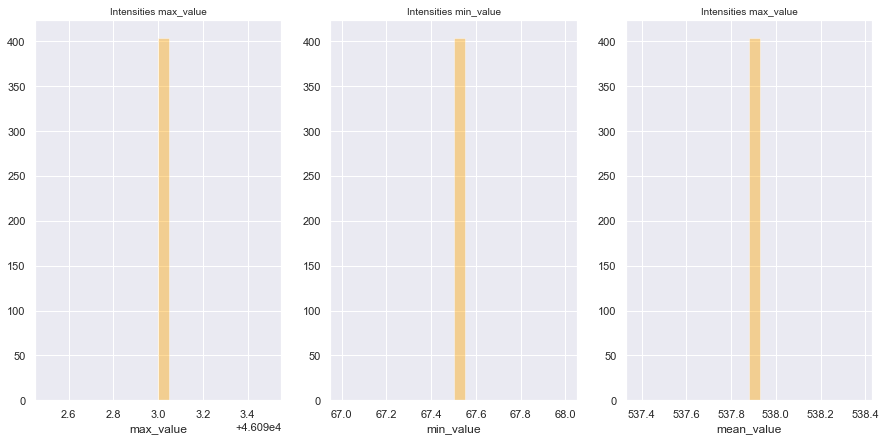

In [9]:
# gráficamos distribución de cada columna
fig, axs = plt.subplots(1,3,figsize=(15,7))
sns.distplot(df_cel.max_value, color='orange',kde=False,ax=axs[0])
axs[0].set_title('Intensities max_value',fontsize=10)
sns.distplot(df_cel.min_value,color='orange',kde=False,ax=axs[1])
axs[1].set_title('Intensities min_value',fontsize=10)
sns.distplot(df_cel.mean_value,color='orange',kde=False,ax=axs[2])
axs[2].set_title('Intensities max_value',fontsize=10);

In [10]:
#Usamos el método describe para ver los estadísticos del dataframe
# la columna Unnamed: 0 es porque no se hizo el reset_index
df_cel.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,404.0,201.50,1.167690e+02,0.00,100.75,201.50,302.25,403.00
max_value,404.0,46093.00,0.000000e+00,46093.00,46093.00,46093.00,46093.00,46093.00
min_value,404.0,67.50,0.000000e+00,67.50,67.50,67.50,67.50,67.50
mean_value,404.0,537.88,2.845695e-12,537.88,537.88,537.88,537.88,537.88
nrows,404.0,712.00,0.000000e+00,712.00,712.00,712.00,712.00,712.00
ncols,404.0,712.00,0.000000e+00,712.00,712.00,712.00,712.00,712.00


Todos los archivos coinciden en los valores estadísticos de intensities: valores extremos y promedio.

In [11]:
import random

../Data/GSE3790/GSM87167.cel


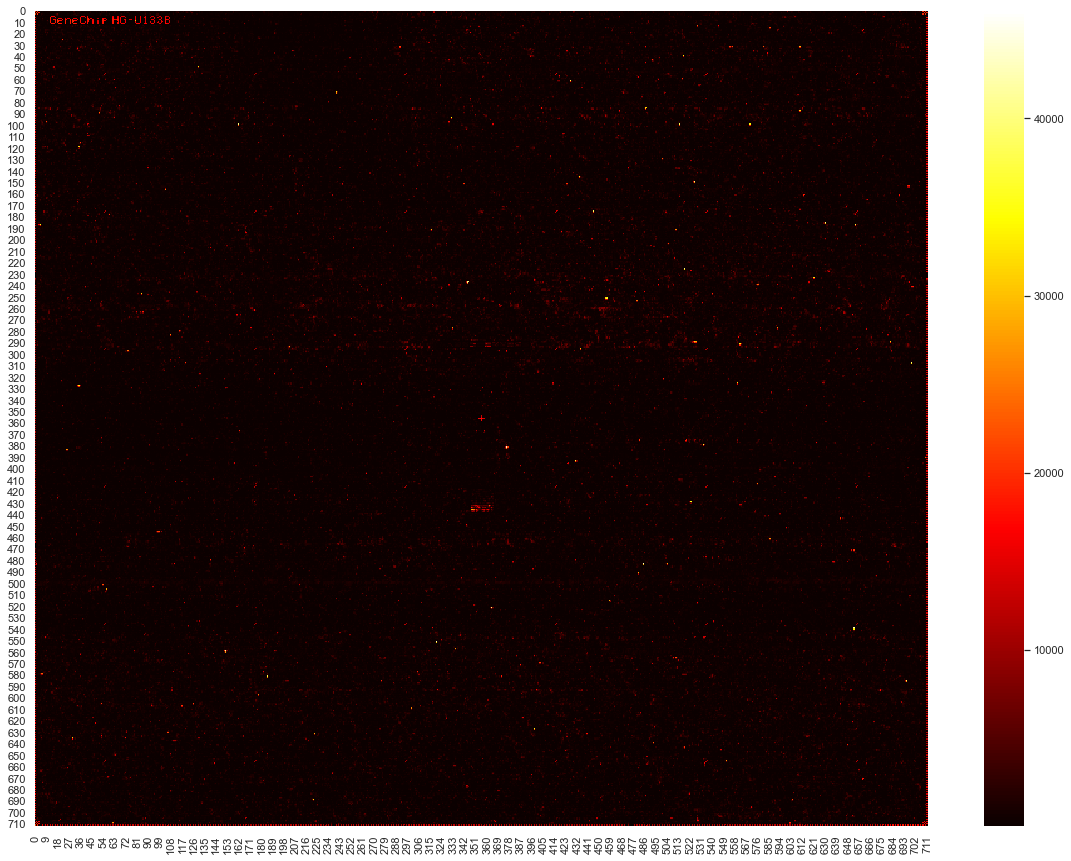

In [12]:
# Realizamos un mapa de calor para ver las intensidades del array en un archivo de ejemplo
choice_file = random.choice([file for file in os.listdir(dir_)])
ejemplo = cel_read(choice_file)

plt.figure(figsize=(20,15))
sns.heatmap(ejemplo.intensities,
            vmin=df_cel.min_value.unique(),
            vmax=df_cel.max_value.unique(),
            cmap='hot');

>**Observaciones del paper:** El dataset se obtienen del Centro Nacional de Información Biotecnológica (NCBI) Gene Expression Omnibus (GEO) con el número de acceso GSE3790. Se perfila mediante un microarreglo Affymetrix (ARN total) para capturar mutaciones en HD utilizando tejido cerebral humano post mórtem en diferentes etapas de la enfermedad. Se diseccionaron muestras de tres áreas del cerebro y se analizaron. Hay 44928 samples.

>**Observaciones del paper:** el dataset tuvo una suerte de proceso de etiqueta con una escala denominada `VONSATTEL` donde a cada caso del HD se le dió una clasificación de 0 a 4 (de 0 a 2 para la mayoría de las muestras) donde el 0 significa que el cerebro macroscopicamente es normal con una perdida de neuronas máxima del 40% y el grado 4 es una atrofia macroscópica grave con pérdida de 90%.

In [13]:
#Creamos un método sencillo para leer los archivos en formato .txt
def cel_to_txt(file):
    file = f'../Data/GSE3790/{file}'
    print(file)
    with open(file,'r') as f:
        cel_data = f.readlines()
        return cel_data

In [24]:
choice_file = random.choice([file for file in os.listdir(dir_)])
ejemplo = cel_to_txt(choice_file)
print(type(ejemplo[17]))
print(' '.join(ejemplo[17].split(' ')[2:10]))

../Data/GSE3790/GSM86923.cel
<class 'str'>
HC81 caudate nucleus:CLS=4733 RWS=4733 XIN=3  YIN=3 


In [32]:
# Recopilamos información sobre cada uno de los archivos
ls_cerebellum = ['cerebellum:CLS=4733']
ls_cortex = ['cortex:CLS=4733','frontal']
ls_nucleus = ['caudate','nucleus:CLS=4733']
df_tissue = pd.DataFrame()

for i,name in enumerate(sorted(os.listdir(dir_))):
    df_tissue.loc[i,'name'] = name
    file = cel_to_txt(name)
    file_splited = file[17].split(' ')[2:10]
    for item in ls_cerebellum:
        if item in file_splited:
            df_tissue.loc[i,'tissue'] = 'cerebellum'
    for item in ls_cortex:
        if item in file_splited:
            df_tissue.loc[i,'tissue'] = 'frontal cortex'
    for item in ls_nucleus:
        if item in file_splited:
            df_tissue.loc[i,'tissue'] = 'caudate nucleus'

../Data/GSE3790/GSM86787.cel
../Data/GSE3790/GSM86788.cel
../Data/GSE3790/GSM86789.cel
../Data/GSE3790/GSM86790.cel
../Data/GSE3790/GSM86791.cel
../Data/GSE3790/GSM86792.cel
../Data/GSE3790/GSM86793.cel
../Data/GSE3790/GSM86794.cel
../Data/GSE3790/GSM86795.cel
../Data/GSE3790/GSM86796.cel
../Data/GSE3790/GSM86797.cel
../Data/GSE3790/GSM86798.cel
../Data/GSE3790/GSM86799.cel
../Data/GSE3790/GSM86800.cel
../Data/GSE3790/GSM86801.cel
../Data/GSE3790/GSM86802.cel
../Data/GSE3790/GSM86803.cel
../Data/GSE3790/GSM86804.cel
../Data/GSE3790/GSM86805.cel
../Data/GSE3790/GSM86806.cel
../Data/GSE3790/GSM86807.cel
../Data/GSE3790/GSM86808.cel
../Data/GSE3790/GSM86809.cel
../Data/GSE3790/GSM86810.cel
../Data/GSE3790/GSM86811.cel
../Data/GSE3790/GSM86812.cel
../Data/GSE3790/GSM86813.cel
../Data/GSE3790/GSM86814.cel
../Data/GSE3790/GSM86815.cel
../Data/GSE3790/GSM86816.cel
../Data/GSE3790/GSM86817.cel
../Data/GSE3790/GSM86818.cel
../Data/GSE3790/GSM86819.cel
../Data/GSE3790/GSM86820.cel
../Data/GSE379

In [33]:
df_tissue.to_csv('tejido_categorias.csv')

In [34]:
df_tissue = pd.read_csv('tejido_categorias.csv')

In [35]:
df_tissue.head()

,Unnamed: 0,name,tissue
0,0,GSM86787.cel,caudate nucleus
1,1,GSM86788.cel,caudate nucleus
2,2,GSM86789.cel,caudate nucleus
3,3,GSM86790.cel,caudate nucleus
4,4,GSM86791.cel,caudate nucleus


In [36]:
df_tissue.isna().sum()

Unnamed: 0    0
name          0
tissue        0
dtype: int64

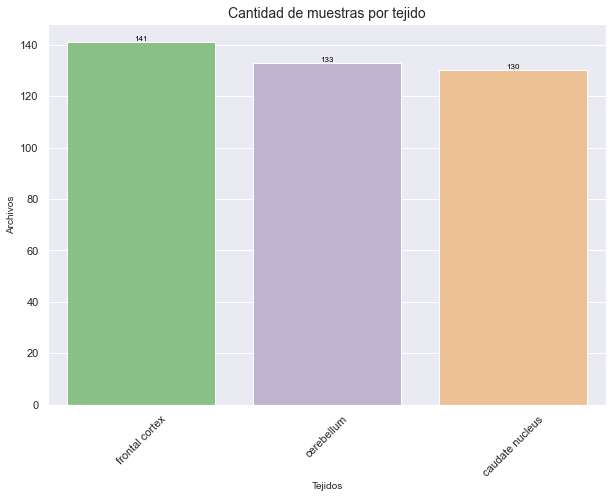

In [38]:
# Observamos gráficamente la proporción de cantidad de archivos dedicados a cada tejido

plt.figure(figsize=(10,7))
ax = sns.barplot(x=df_tissue['tissue'].value_counts().index,
                 y=df_tissue['tissue'].value_counts(),
                 palette='Accent')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.1),
                ha='center', va='bottom', color='black', fontsize=8, rotation=0)

plt.ylabel('Archivos',fontsize=10)
plt.xticks(rotation=45)
plt.xlabel('Tejidos',fontsize=10)
plt.title('Cantidad de muestras por tejido',fontsize=14);

In [21]:
# def cel_to_df(file):
#     file = f'../Data/GSE3790/{file}'
#     print(file)
#     with open(file,'r') as handle:
#         cel_data = CelFile.read(handle)
#         df = pd.DataFrame({'intensities':cel_data.intensities,
#                           'stdevs':cel_data.stdevs,
#                           'npix':cel_data.npix},
#                           index=range(len(cel_data.intensities)))
#         return df